

# Exploratory Data Analysis of Guns' Access in the USA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This is Project 1 - Investigate a Dataset!
Written by Pius Uagbae Ejodamen;
as part of requirements for obtaining a Data Analyst Nanodegree from ALX-T/Udacity.


### Dataset Description 

The datasets used for this investigation are census and FBI's National Instant Criminal Background Check System (NICS) curated data. Gun dealers could do a background check to confirm the eligibility of a buyer to acquire guns or explosives. The NICS provides information on the checks performed across different states in the USA. This data is not suitable to measure gun sales. The census data, on the other hand, provides more information on a state-by-state basis. It is worthy of note that the census dataset is messy and dirty; hence, requiring intense data cleaning.


The NICS comprises of the following features:
<p>
<b>S/N  Attributes                 No of records   Datatype </b><l>
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  float64
 14  redemption_other           5115 non-null   float64
 15  returned_handgun           2200 non-null   float64
 16  returned_long_gun          2145 non-null   float64
 17  returned_other             1815 non-null   float64
 18  rentals_handgun            990 non-null    float64
 19  rentals_long_gun           825 non-null    float64
 20  private_sale_handgun       2750 non-null   float64
 21  private_sale_long_gun      2750 non-null   float64
 22  private_sale_other         2750 non-null   float64
 23  return_to_seller_handgun   2475 non-null   float64
 24  return_to_seller_long_gun  2750 non-null   float64
 25  return_to_seller_other     2255 non-null   float64
 26  totals                     12485 non-null  int64  </l>
 
 
 Also, the census dataset comprises of the states in the USA:
 No   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky        65 non-null     object
 19  Louisiana       65 non-null     object
 20  Maine           65 non-null     object
 21  Maryland        65 non-null     object
 22  Massachusetts   65 non-null     object
 23  Michigan        65 non-null     object
 24  Minnesota       65 non-null     object
 25  Mississippi     65 non-null     object
 26  Missouri        65 non-null     object
 27  Montana         65 non-null     object
 28  Nebraska        65 non-null     object
 29  Nevada          65 non-null     object
 30  New Hampshire   65 non-null     object
 31  New Jersey      65 non-null     object
 32  New Mexico      65 non-null     object
 33  New York        65 non-null     object
 34  North Carolina  65 non-null     object
 35  North Dakota    65 non-null     object
 36  Ohio            65 non-null     object
 37  Oklahoma        65 non-null     object
 38  Oregon          65 non-null     object
 39  Pennsylvania    65 non-null     object
 40  Rhode Island    65 non-null     object
 41  South Carolina  65 non-null     object
 42  South Dakota    65 non-null     object
 43  Tennessee       65 non-null     object
 44  Texas           65 non-null     object
 45  Utah            65 non-null     object
 46  Vermont         65 non-null     object
 47  Virginia        65 non-null     object
 48  Washington      65 non-null     object
 49  West Virginia   65 non-null     object
 50  Wisconsin       65 non-null     object
 51  Wyoming         65 non-null     object



### Question(s) for Analysis

This project seek answers to the following questions:
Which state made the highest permit checks? In what month and year?
What type of gun was most prefered in Texas in 2017? 
How many poor people in New York might have checked for multiple weapons?

Import relevant Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Load your data and print out a few lines. Perform operations to inspect data types
and look for instances of missing or possibly errant data.

Upload relevent datasets to Pandas DataFrames

In [3]:
df_gun = pd.read_csv('gun_data.csv')

Check the data types of the fields 

In [4]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [5]:
#Convert the data type of 'multiple' to match other fields
df_gun['multiple'] = df_gun['multiple'].astype('float64')

Check to confirm it has been effected.

In [6]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                     float64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

The features in the gun dataset shows that there are several categories of gun enquiries <p>
However, most of them are filled with empty or null enteries; making them unsuitable for analysis. 
Besides, our research questions can be answered with few relevant features.

In [7]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Now the Gun data is suitably clean for this exercise, <p>
Next, we examine the Census dataset.

In [8]:
#Upload relevent datasets to Pandas DataFrames
df_census = pd.read_csv('US_Census_Data.csv')

Check to ensure that dataset is uploaded

In [9]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

The census dataset contains information about all states in the USA. It details some facts about the states. 
For example, the dataset contains information of poor people, gender of owners of companies, and so on.


## Data Cleaning

After discussing the structure of the data and any problems that need to be cleaned,
we perform those cleaning steps in the second part of this section.

The census data is quite dirty. While most of the columns may not be needed in this study,
there is need to remove certain cells altogether

The 'Fact Note' attribute of the census dataset should be removed, 
since it does not provide any additional relevance for this analysis.

Delete the 'Fact Note' feature from the dataset

In [11]:
df_census.drop(columns='Fact Note', inplace=True)

Check the new data.
It can be observed that the states are the attributes/features in the census dataset. Several insights can be derived from it, inlcuding the average population in the country, population growth between 2010 and 2016, and so on.

In [12]:
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Slice and retain part of the dataset with meaningful data

In [13]:
df_census = df_census.iloc[:65, :]

Check the structure of the sliced dataset

In [14]:
df_census.shape

(65, 51)

In [15]:
#Check to see if any attribute has empty/null cells        
df_census.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [16]:
df_census.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


We can agree that the Census dataset is now suitable for further manipulations

Further checks is to be carried out on the Gun dataset to understand its nature

In [17]:
df_gun.shape  

(12485, 27)

In [18]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

We notice so much inconsistencies in the Gun dataset. <p>
First, we drop rows with missing data  <p>
Looking at the dataset, notice that only few of the columns are relevant to our investigation <p>
The relevant columns are sliced for further analysis

In [19]:
df_gun=df_gun.iloc[:, :8]

We re-examine the dataframe for structure and null values

In [20]:
df_gun.shape

(12485, 8)

Take note that the data frame had (12485, 27)
but after the slicing, we have (12485, 8); only the features relevant for this study are retained.

In [21]:
df_gun.tail(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple
12475,1998-11,Tennessee,0.0,NaN,19.0,85.0,NaN,3.0
12476,1998-11,Texas,0.0,NaN,1384.0,1349.0,NaN,60.0
12477,1998-11,Utah,0.0,NaN,98.0,169.0,NaN,0.0
12478,1998-11,Vermont,0.0,NaN,23.0,35.0,NaN,0.0
12479,1998-11,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0.0
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8.0
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8.0
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5.0
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2.0
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5.0


We notice that 'permit_recheck' and 'other' have too many empty cells, with negligible information <p>

Removing the null cells will impact negatively on the insights to be derived #Hence, we drop the columns altogether

In [22]:
df_gun.isnull().sum()

month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
long_gun             19
other              6985
multiple              0
dtype: int64

In [23]:
df_gun.drop(columns=['permit_recheck', 'other'], inplace=True)

Recheck to be sure the irrelevant columns have been dropped

In [24]:
df_gun.shape

(12485, 6)

In [25]:
df_gun.isnull().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
multiple     0
dtype: int64

Identify rows where there are null cells for 'permit', 'handgun', and 'long_gun' <p>
This is necessary to preserve relevant information as much as possible.<p>
For example, deleting all null entries for 'permit', 
will lead to loss of four (4) information in 'handgun' and five(5) in 'long_gun'

In [26]:
df_drop_rows = df_gun.loc[df_gun['permit'].isnull() & df_gun['handgun'].isnull() & df_gun['long_gun'].isnull()].index

In [27]:
df_gun.drop(df_drop_rows, inplace=True)

Check the structure of the dataframe. 
Notice that 19 cells are deleted because the were null for the three features earlier mentioned.

In [28]:
df_gun.isnull().sum()

month       0
state       0
permit      5
handgun     1
long_gun    0
multiple    0
dtype: int64

The few remaining null values can be replaced with 0, since some other cells have a minimum of 0

In [29]:
df_gun.describe()

,permit,handgun,long_gun,multiple
count,12461.000000,12465.000000,12466.000000,12466.000000
mean,6413.629404,5940.881107,7810.847585,269.012755
std,23752.338269,8618.584060,9309.846140,783.711473
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2078.250000,15.000000
50%,518.000000,3059.000000,5122.000000,125.500000
75%,4272.000000,7280.000000,10380.750000,301.000000
max,522188.000000,107224.000000,108058.000000,38907.000000


In [30]:
df_gun.fillna(value=0, inplace=True)

Now, confirm that the dataset is clean enough.

In [31]:
df_gun.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
multiple    0
dtype: int64

Looking at the dataset, it can be observed that month and year are together in a cell. It is neater and better for analysis when each are in different columns. Hence, the next step is to split the attribute into 'month' and 'year'. 
By so doing, each cell would contain unique value.

In [32]:
df_gun['year'], df_gun['month'] = df_gun['month'].str.split('-', 1).str

<ipython-input-32-590957e8022e>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_gun['year'], df_gun['month'] = df_gun['month'].str.split('-', 1).str


In [33]:
df_gun.head()

,month,state,permit,handgun,long_gun,multiple,year
0,09,Alabama,16717.0,5734.0,6320.0,317.0,2017
1,09,Alaska,209.0,2320.0,2930.0,160.0,2017
2,09,Arizona,5069.0,11063.0,7946.0,631.0,2017
3,09,Arkansas,2935.0,4347.0,6063.0,366.0,2017
4,09,California,57839.0,37165.0,24581.0,0.0,2017


<a id='eda'></a>
## Exploratory Data Analysis
In this section, we investigate for relevant information from the cleaned datasets. 
We ask some questions that will guide our analysis.

First, we define a function to handle our various plots while avoiding repetitive codes.
Also, we visualize the guns dataset to give some insight.

In [34]:
def make_plots(df, x_axis, y_axis, plot_title, plot_type):
    df.plot(x=x_axis, y=y_axis, title=plot_title, kind=plot_type, figsize=[8,8]);

In [35]:
df_gun=df_gun.sort_values(by='month')

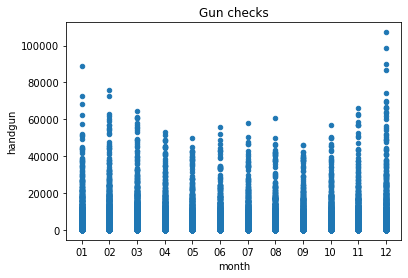

In [36]:
df_gun.plot(x='month', y='handgun', title='Gun checks', kind='scatter');

The chart illustrates the checks for handguns, with December (i.e 12) recording the highest demand.


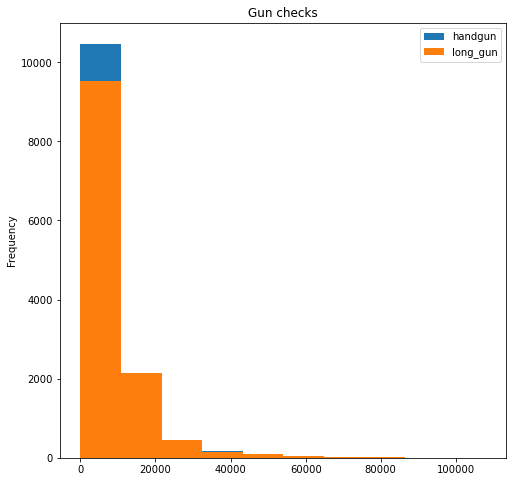

In [37]:
#Histogram plot to show the distribution in the gun checks.                                              
make_plots(df=df_gun, x_axis='month', y_axis=['handgun', 'long_gun'], plot_title='Gun checks', plot_type='hist')

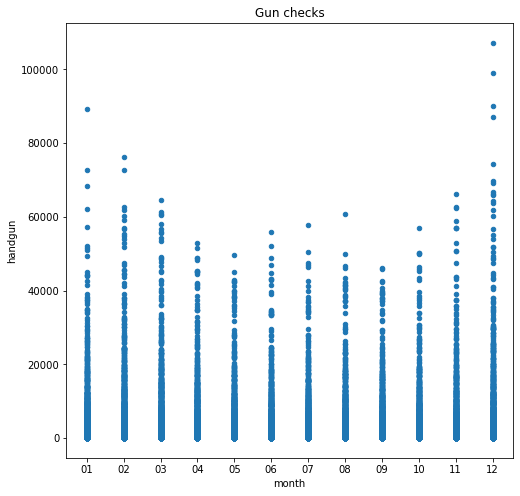

In [38]:
make_plots(df=df_gun, x_axis='month', y_axis='handgun', plot_title='Gun checks', plot_type='scatter')

The scatter plot shows how handguns were requested for background checks.

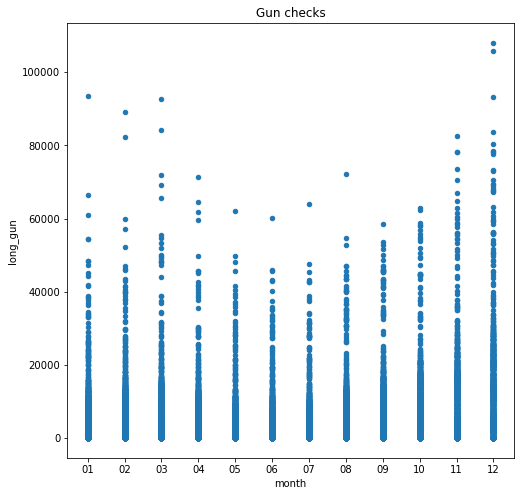

In [39]:
make_plots(df=df_gun, x_axis='month', y_axis='long_gun', plot_title='Gun checks', plot_type='scatter')

The scatter plot shows how long guns were requested for background checks. It gives an insight into the months that long guns may be in high demand.


### Research Question 1: 
#### Which state made the highest permit checks? In what month and year? 

In [40]:
#Calculate the maximum value in the 'permit' column
max_val = df_gun['permit'].max()

In [41]:
#Get the records for the maximum 'permit' value
df_check = df_gun.query('permit == @max_val')

In [42]:
df_check

,month,state,permit,handgun,long_gun,multiple,year
2345,03,North Carolina,522188.0,1054.0,13571.0,227.0,2014


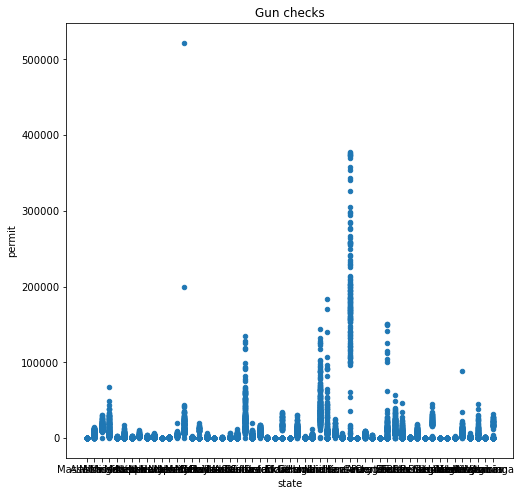

In [43]:
make_plots(df=df_gun, x_axis='state', y_axis='permit', plot_title='Gun checks', plot_type='scatter')

We notice from the scatter plot, that there were more permit checks in some states than in others. Also, some notable outliers can be seen. Further investigation may seek to know the reason for the obvious outliers and the states where they occured.

### Answer to Research Question 1: 
#### North Carolina made the highest gun checks, which occured in March 2014.

### Research Question 2: 
#### What type of gun was most prefered in Texas in 2017? 

In [44]:
df_gun.state.tail()

11100         Tennessee
11099      South Dakota
11098    South Carolina
11107     West Virginia
3163            Montana
Name: state, dtype: object

We search for information about Texas in year 2017.

Then we add up all the request for that year, for each field.

Focus should be on the numeric values; concatenation of strings are not considered here.

In [45]:
df_Texas = df_gun.query('state=="Texas"  & year=="2017"')
df_Texas.sum()

month                                  010203040506070809
state       TexasTexasTexasTexasTexasTexasTexasTexasTexas
permit                                             228878
handgun                                            405030
long_gun                                           285530
multiple                                            22660
year                 201720172017201720172017201720172017
dtype: object

We visualize the gun checks for Texas in the year 2017. <p>
The earlier created function 'make_plots' will be used with required parameters supplied.

In [46]:
df_Texas=df_Texas.sort_values(by='month')

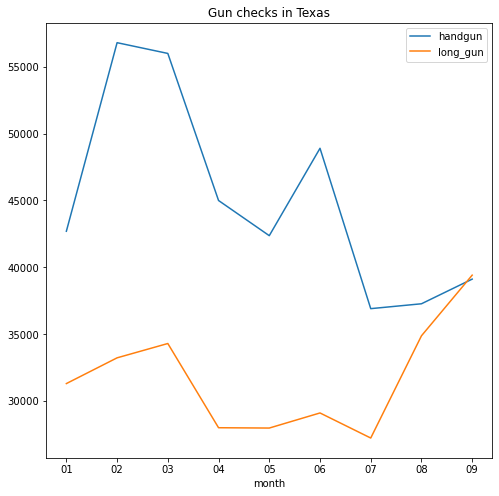

In [47]:
make_plots(df=df_Texas, x_axis='month', y_axis=['handgun', 'long_gun'], plot_title='Gun checks in Texas', plot_type='line')

We observe there was steady decline in the number of gun checks in Texas.<p>
The least checks was observed in July (i.e. 07), followed by a small increase.

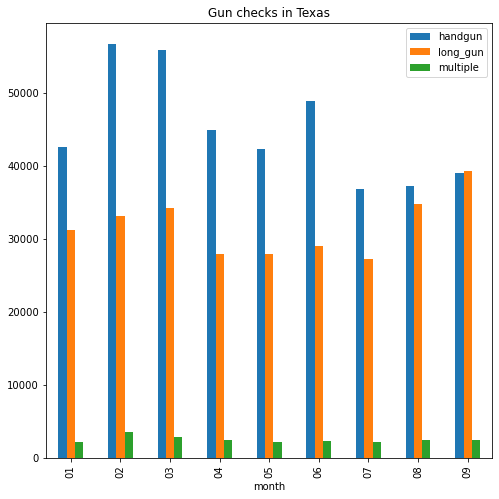

In [48]:
#Call the make_plot function to create the needed plot
make_plots(df=df_Texas, x_axis='month', y_axis=['handgun', 'long_gun', 'multiple'], plot_title='Gun checks in Texas', plot_type='bar')

It can be observed that handgun towers above almost all gun enquiries in 2017. <p>
This is an indication that in Texas, more people are interested in handgun that in long_guns.

### Answer to Research Question  2: 
#### In year 2017, handgun was most preferred in Texas with 405030 enquiries.



### Research Question 3: 
#### How many poor people in New York might have checked for multiple weapons? 

First, search for checks made in New York, then compute the total checks

In [49]:
df_NJ = df_gun.query('state=="New York"')
gun_checks = df_NJ['multiple'].sum()

In [50]:
gun_checks

18256.0

In [51]:
df_poor=df_census.query('Fact == "Persons in poverty, percent"')['New York'].values
df_poor

array(['0.147'], dtype=object)

Change the datatype from string (dataframe object) to numeric value

In [52]:
poor=df_poor.astype('float64')

To get the number of poor persons that performed gun checks for multiple weapons,
Multiply the number of gun checks by the percentage of poor people in that state.

In [53]:
print(gun_checks * poor)

[2683.632]


### Answer to Research Question 3: 
#### About 2,684 poor people in New York performed checks for multiple weapons.

<a id='conclusions'></a>
## Conclusions

#### Results
In this expoloratory data analysis, we have investigated checks for guns in the United States of America. 
It was observed that North Carolina made the highest gun checks during the period under review, which occured in March 2014.
Also, in year 2017, handgun was most preferred in Texas with cumulative total of 405030 enquiries.

An estimated 14.7% of people in New York are living in poverty. Between 1998 and 2017, a total of 18256 multiple weapons checks
were recorded for New York. This means that about 2,684 poor people in New York performed checks for multiple weapons.

It should be noted that gun enquires does not always lead to sales. Some states in the USA perform routine checks on gun holders. 
Also, a background check is required for anyone intending to buy weapons, ascertaining their suitability. 

#### Limitations
The guns dataset is riddled with so many attributes, many of which are not required in this study. Particularly, we stay limited to 'month', 'state', 'permit', 'short guns', 'long_guns', and 'multple'; they are most relevant to our study. <p>
    
    It is noteworthy that this dataset cannot be used to analyse buying pattern.

<a id='references'></a>
## References

1. https://stackoverflow.com/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'EjodamenPU2_Investigate_a_Dataset.ipynb'])

4294967295

In [54]:
#Install converter libraries, if not available in system
#pip install nbconvert[webpdf] --allow-chromium-download

In [55]:
#pip install nbconvert[webpdf] --allow-chromium-download